## Dublin apartemnt rental project

As a person who has been changing apartments a lot around Dublin, I like to check daft.ie website and see what kind of properties pop up there. Finding a good place to live in Dublin is gettig more diffucult due to the incrreasing rent and also fewer places available. It gave me an idea for this projcet- to compare how the rental market in Dublin has changed between September 2020 (in the middle of the pandemics) and post lockdowns- June 223. 
The Daft rental database from 2020 was obtained from Kaggle: https://www.kaggle.com/d17129765/predicting-dublin-rental-daftie. The data from June 2023 I scraped myslef with the help of this tutorial: (https://kiransid0205.github.io/posts/post01/). 

I want to compare how the rents, number of properties available and overall prices between different parts of Dublin have changed between September 2020 and June 2023. 

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import statsmodels.api as sm
import folium
import geopandas as gpd
import requests
import json
import geojson

from shapely.geometry import Point
from geopy.geocoders import Nominatim

%matplotlib inline 


In [2]:
#pip install geojson

In [3]:
# Import data from 2020 and 2023

dub20 = pd.read_csv('daft_v_2.csv') #data from 2020
dub23 = pd.read_excel('Daft_June_2023.xlsx') #data from 2023

In [4]:
dub20.head()

price                                            address  \
0    €8,400 Per week            Sorrento Road, Dalkey, South Co. Dublin   
1  €15,000 Per month  Ailesbury Road, Ballsbridge, Dublin 4, South D...   
2  €15,000 Per month  5 Elgin Road, Ballsbridge, Ballsbridge, Dublin...   
3  €10,000 Per month  Elgin Road, Ballsbridge, Ballsbridge, Dublin 4...   
4   €9,400 Per month  3 Tempe Terrace, Rockfort Avenue, Dalkey, Sout...   

   bathroom  bedroom      furnish  \
0         5        5    Furnished   
1         6        6    Furnished   
2         5        5  Unfurnished   
3         5        4  Unfurnished   
4         5        3  Unfurnished   

                                         description property type        ID  \
0  \n                        Rent is 1,200 per n...         House  21612293   
1  \n                        Knight Frank are ple...         House  22045922   
2  \n                        REA Halnon McKenna a...         House  22048233   
3  \n                        Professionally Manag...         House  22043562   
4  \n                        AVAILABLE JANUARY 20...         House  22059358   

    longitude     latitude  
0  -6.0968750  53.27431100  
1  -6.2170860  53.32005800  
2  -6.2368910  53.33003200  
3  -6.2332720  53.32961300  
4  -6.1003530  53.27699400

In [5]:
dub23.head()

Rent Property_type Bedrooms Bathrooms  \
0  1,800 per month      Apartment    1 Bed    1 Bath   
1  2,600 per month      Apartment    2 Bed    2 Bath   
2  3,300 per month      Apartment    2 Bed    2 Bath   
3  1,695 per month      Apartment    1 Bed    1 Bath   
4  3,100 per month      Apartment    2 Bed    2 Bath   

                                            Address   Latitude  Longitude  
0         40 Castlewood Avenue, Rathmines, Dublin 6  53.322812  -6.263295  
1         120 Grianan Fidh, Aiken's Village, Dublin  53.261764  -6.217312  
2                  Apt. 6, 34 Ushers Quay, Dublin 8  53.345870  -6.279770  
3  1o Gandon Hall Gardner Street Dublin 1, Dublin 1  53.352269  -6.255170  
4            The Sweepstakes, Ballsbridge, Dublin 4  53.331647  -6.228297

In [6]:
dub20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          2718 non-null   object
 1   address        2718 non-null   object
 2   bathroom       2718 non-null   int64 
 3   bedroom        2718 non-null   int64 
 4   furnish        2706 non-null   object
 5   description    2134 non-null   object
 6   property type  2718 non-null   object
 7   ID             2718 non-null   int64 
 8   longitude      2718 non-null   object
 9   latitude       2718 non-null   object
dtypes: int64(3), object(7)
memory usage: 212.5+ KB


In [7]:
dub23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rent           698 non-null    object 
 1   Property_type  698 non-null    object 
 2   Bedrooms       698 non-null    object 
 3   Bathrooms      698 non-null    object 
 4   Address        698 non-null    object 
 5   Latitude       698 non-null    float64
 6   Longitude      698 non-null    float64
dtypes: float64(2), object(5)
memory usage: 38.3+ KB


In [8]:
# Remove euro sign from the price columns 
dub20['price'] = dub20['price'].apply(lambda x: x.replace('€', ''))
dub20['price'] = dub20['price'].apply(lambda x: x.replace(',', ''))

dub23['Rent'] = dub23['Rent'].apply(lambda x: x.replace('€', ''))
dub23['Rent'] = dub23['Rent'].apply(lambda x: x.replace(',', ''))

dub23['Bedrooms'] = dub23['Bedrooms'].apply(lambda x : x.replace('Bed', ''))
dub23['Bathrooms'] = dub23['Bathrooms'].apply(lambda x: x.replace('Bath', ''))

In [9]:
dub20.head()

price                                            address  \
0    8400 Per week            Sorrento Road, Dalkey, South Co. Dublin   
1  15000 Per month  Ailesbury Road, Ballsbridge, Dublin 4, South D...   
2  15000 Per month  5 Elgin Road, Ballsbridge, Ballsbridge, Dublin...   
3  10000 Per month  Elgin Road, Ballsbridge, Ballsbridge, Dublin 4...   
4   9400 Per month  3 Tempe Terrace, Rockfort Avenue, Dalkey, Sout...   

   bathroom  bedroom      furnish  \
0         5        5    Furnished   
1         6        6    Furnished   
2         5        5  Unfurnished   
3         5        4  Unfurnished   
4         5        3  Unfurnished   

                                         description property type        ID  \
0  \n                        Rent is 1,200 per n...         House  21612293   
1  \n                        Knight Frank are ple...         House  22045922   
2  \n                        REA Halnon McKenna a...         House  22048233   
3  \n                        Professionally Manag...         House  22043562   
4  \n                        AVAILABLE JANUARY 20...         House  22059358   

    longitude     latitude  
0  -6.0968750  53.27431100  
1  -6.2170860  53.32005800  
2  -6.2368910  53.33003200  
3  -6.2332720  53.32961300  
4  -6.1003530  53.27699400

In [10]:
dub23.head()

Rent Property_type Bedrooms Bathrooms  \
0  1800 per month      Apartment       1         1    
1  2600 per month      Apartment       2         2    
2  3300 per month      Apartment       2         2    
3  1695 per month      Apartment       1         1    
4  3100 per month      Apartment       2         2    

                                            Address   Latitude  Longitude  
0         40 Castlewood Avenue, Rathmines, Dublin 6  53.322812  -6.263295  
1         120 Grianan Fidh, Aiken's Village, Dublin  53.261764  -6.217312  
2                  Apt. 6, 34 Ushers Quay, Dublin 8  53.345870  -6.279770  
3  1o Gandon Hall Gardner Street Dublin 1, Dublin 1  53.352269  -6.255170  
4            The Sweepstakes, Ballsbridge, Dublin 4  53.331647  -6.228297

In [11]:
#Converting rent from weekly to monthly for 2020 data
rent20 = []

for rent in dub20['price']:
    num = re.findall('\d+\.?\d*', rent)
    num = ''.join(num)
    num = int(num)
    if 'Per week' in rent:
        num = (num/7)*30
        
    rent20.append(num)
    
dub20 = dub20.copy()
dub20['price'] = rent20

In [12]:
#Converting rent from weekly to monthly for 2023 data

rent23 = []

for rent in dub23['Rent']:
    num = re.findall('\d+\.?\d*', rent)
    num = ''.join(num)
    num = int(num)
    if 'Per week' in rent:
        num = (num/7)*30
    
    rent23.append(num)
    
dub23 =dub23.copy()
dub23['Rent'] = rent23

In [13]:
dub23['Rent'].dtype

dtype('int64')

In [14]:
dub20['price'].dtype

dtype('float64')

In [15]:
# Convert rents and num of Bedrooms and Bathrooms to intigers

dub20['price'] = dub20['price'].astype(int)

dub23['Bedrooms'] = dub23['Bedrooms'].astype(int)
dub23['Bathrooms'] = dub23['Bathrooms'].astype(int)

In [16]:
dub23['Bedrooms'].dtype

dtype('int32')

In [17]:
dub23['Bathrooms'].dtype

dtype('int32')

In [18]:
#Checking the number of properties to rent in 2020
dub20['property type'].value_counts()

Apartment    1869
House         574
Studio        175
Flat          100
Name: property type, dtype: int64

In [19]:
#Checking the number of properties to rent in 2023

dub23['Property_type'].value_counts()


Apartment    441
House        188
Studio        68
 House         1
Name: Property_type, dtype: int64

In [20]:
### Quite a big decrease of properties to rent during the last 3 years

In [21]:
dub20.head()

price                                            address  bathroom  \
0  36000            Sorrento Road, Dalkey, South Co. Dublin         5   
1  15000  Ailesbury Road, Ballsbridge, Dublin 4, South D...         6   
2  15000  5 Elgin Road, Ballsbridge, Ballsbridge, Dublin...         5   
3  10000  Elgin Road, Ballsbridge, Ballsbridge, Dublin 4...         5   
4   9400  3 Tempe Terrace, Rockfort Avenue, Dalkey, Sout...         5   

   bedroom      furnish                                        description  \
0        5    Furnished  \n                        Rent is 1,200 per n...   
1        6    Furnished  \n                        Knight Frank are ple...   
2        5  Unfurnished  \n                        REA Halnon McKenna a...   
3        4  Unfurnished  \n                        Professionally Manag...   
4        3  Unfurnished  \n                        AVAILABLE JANUARY 20...   

  property type        ID   longitude     latitude  
0         House  21612293  -6.0968750  53.27431100  
1         House  22045922  -6.2170860  53.32005800  
2         House  22048233  -6.2368910  53.33003200  
3         House  22043562  -6.2332720  53.32961300  
4         House  22059358  -6.1003530  53.27699400

In [22]:
dub23.head()

Rent Property_type  Bedrooms  Bathrooms  \
0  1800     Apartment         1          1   
1  2600     Apartment         2          2   
2  3300     Apartment         2          2   
3  1695     Apartment         1          1   
4  3100     Apartment         2          2   

                                            Address   Latitude  Longitude  
0         40 Castlewood Avenue, Rathmines, Dublin 6  53.322812  -6.263295  
1         120 Grianan Fidh, Aiken's Village, Dublin  53.261764  -6.217312  
2                  Apt. 6, 34 Ushers Quay, Dublin 8  53.345870  -6.279770  
3  1o Gandon Hall Gardner Street Dublin 1, Dublin 1  53.352269  -6.255170  
4            The Sweepstakes, Ballsbridge, Dublin 4  53.331647  -6.228297

In [23]:
dub23.tail()

Rent Property_type  Bedrooms  Bathrooms  \
693  2750     Apartment         2          2   
694  1895     Apartment         1          1   
695  2157     Apartment         1          1   
696  4000     Apartment         2          3   
697  6500     Apartment         3          4   

                                               Address   Latitude  Longitude  
693                U HX, Harolds Cross Road, Dublin 6W  53.320167  -6.278897  
694  Charlotte Apartments, Honeypark, Dun Laoghaire...  53.279638  -6.145739  
695   Walled Garden , Wyckham Way , Dundrum, Dublin 14  53.281287  -6.241019  
696    Number 1 Ballsbridge, Shelbourne Road, Dublin 4  53.332274  -6.232683  
697    Number 1 Ballsbridge, Shelbourne Road, Dublin 4  53.332274  -6.232683

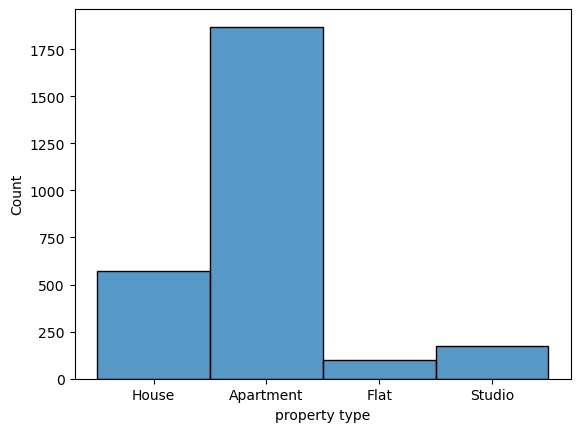

In [24]:
ax = sns.histplot(dub20['property type'])

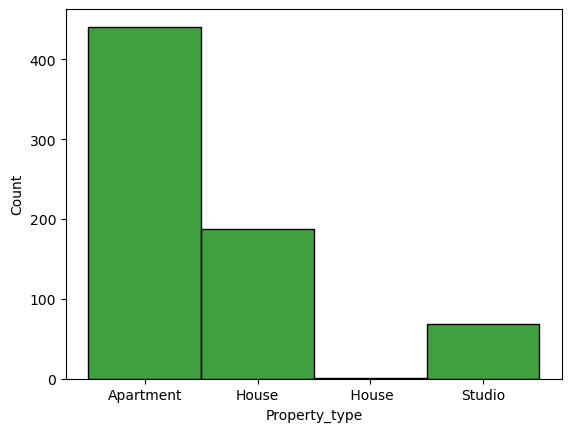

In [25]:
ax = sns.histplot(dub23['Property_type'], color ='green')

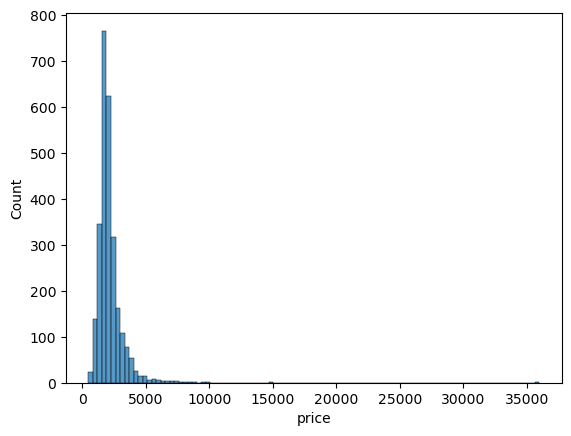

In [26]:
ax = sns.histplot(dub20['price'], bins=100)

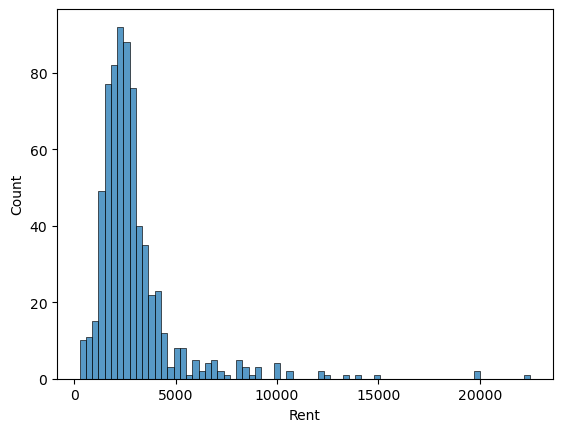

In [27]:
ax= sns.histplot(dub23['Rent'])

In [28]:
dub20['Rent_per_bed'] = None # new column that represents rent per bedroom

for index, row in dub20.iterrows():
    if row['bedroom'] == 0:
        dub20.at[index, 'Rent_per_bed'] = row['price']
    else:
        dub20.at[index, 'Rent_per_bed'] = row['price']/row['bedroom']

In [29]:
dub20.head()

price                                            address  bathroom  \
0  36000            Sorrento Road, Dalkey, South Co. Dublin         5   
1  15000  Ailesbury Road, Ballsbridge, Dublin 4, South D...         6   
2  15000  5 Elgin Road, Ballsbridge, Ballsbridge, Dublin...         5   
3  10000  Elgin Road, Ballsbridge, Ballsbridge, Dublin 4...         5   
4   9400  3 Tempe Terrace, Rockfort Avenue, Dalkey, Sout...         5   

   bedroom      furnish                                        description  \
0        5    Furnished  \n                        Rent is 1,200 per n...   
1        6    Furnished  \n                        Knight Frank are ple...   
2        5  Unfurnished  \n                        REA Halnon McKenna a...   
3        4  Unfurnished  \n                        Professionally Manag...   
4        3  Unfurnished  \n                        AVAILABLE JANUARY 20...   

  property type        ID   longitude     latitude Rent_per_bed  
0         House  21612293  -6.0968750  53.27431100       7200.0  
1         House  22045922  -6.2170860  53.32005800       2500.0  
2         House  22048233  -6.2368910  53.33003200       3000.0  
3         House  22043562  -6.2332720  53.32961300       2500.0  
4         House  22059358  -6.1003530  53.27699400  3133.333333

In [30]:
dub23['Rent_per_bed'] = None # new column that represents rent per bedroom

for index, row in dub23.iterrows():
    if row['Bedrooms'] == 0:
        dub23.at[index, 'Rent_per_bed'] = row['Rent']
    else:
        dub23.at[index, 'Rent_per_bed'] = row['Rent']/row['Bedrooms']

In [31]:
dub23.head()

Rent Property_type  Bedrooms  Bathrooms  \
0  1800     Apartment         1          1   
1  2600     Apartment         2          2   
2  3300     Apartment         2          2   
3  1695     Apartment         1          1   
4  3100     Apartment         2          2   

                                            Address   Latitude  Longitude  \
0         40 Castlewood Avenue, Rathmines, Dublin 6  53.322812  -6.263295   
1         120 Grianan Fidh, Aiken's Village, Dublin  53.261764  -6.217312   
2                  Apt. 6, 34 Ushers Quay, Dublin 8  53.345870  -6.279770   
3  1o Gandon Hall Gardner Street Dublin 1, Dublin 1  53.352269  -6.255170   
4            The Sweepstakes, Ballsbridge, Dublin 4  53.331647  -6.228297   

  Rent_per_bed  
0       1800.0  
1       1300.0  
2       1650.0  
3       1695.0  
4       1550.0

In [81]:
round(dub20['price'].mean(), 2) #mean rent price in 2023

2172.72

In [33]:
dub20['price'].median()  #median rent price in 2020

1950.0

In [82]:
round(dub23['Rent'].mean(),2) #mean rent price in 2023

2948.34

In [35]:
dub23['Rent'].median() #median rent price in 2023

2500.0

In [36]:
dub20_studio = dub20[(dub20['property type'])=='Studio']

In [37]:
dub20_studio.head()

price                                            address  bathroom  \
819    2250  Grafton Street Superior Studio Apartments, Dub...         0   
1437   1907  Grafton Street Loft Studio Apartments, Dublin ...         0   
1850   1750  Mespil Estate Dubllin 4, Donnybrook, Dublin 4,...         0   
1878   1750  Mespil Estate Dubllin 4, Donnybrook, Dublin 4,...         0   
1885   1714  Anglesea Road, Ballsbridge, Dublin 4, South Du...         0   

      bedroom    furnish                                        description  \
819         0  Furnished  \n                        Located between Trin...   
1437        0  Furnished  \n                        Located between Trin...   
1850        0  Furnished                                                NaN   
1878        0  Furnished                                                NaN   
1885        0  Furnished  \n                        Corporate SHORT-LET ...   

     property type        ID   longitude     latitude Rent_per_bed  
819         Studio  22053788  -6.2606750  53.34112900         2250  
1437        Studio  22053804  -6.2606750  53.34112900         1907  
1850        Studio  22056891  -6.2502780  53.33135300         1750  
1878        Studio  22056891  -6.2502780  53.33135300         1750  
1885        Studio  22038706  -6.2311470  53.32517500         1714

In [38]:
dub20_studio['price'].mean() #mean price for studio apartment in 2020

1144.44

In [39]:
dub20_studio['price'].median() #median price for studio apartment in 2020

1150.0

In [40]:
dub23_studio = dub23[(dub23['Property_type']=='Studio')]

In [41]:
dub23_studio.head()

Rent Property_type  Bedrooms  Bathrooms  \
569  1650        Studio         0          1   
570  1800        Studio         0          1   
571  1550        Studio         0          1   
572  1850        Studio         0          1   
573  1150        Studio         0          1   

                                               Address   Latitude  Longitude  \
569    Daneswell Place, Dublin 9, Drumcondra, Dublin 3  53.367257  -6.269265   
570  Doyle's Corner, North Circular Road, Phibsboro...  53.361040  -6.272523   
571                      North Circular Road, Dublin 7  53.361302  -6.268252   
572               Waterloo Road, Ballsbridge, Dublin 4  53.330647  -6.244415   
573          North Strand Road, North Strand, Dublin 3  53.358458  -6.242998   

    Rent_per_bed  
569         1650  
570         1800  
571         1550  
572         1850  
573         1150

In [42]:
dub23_studio['Rent'].mean() #mean price for studio apartment in 2023

1339.3088235294117

In [43]:
dub23_studio['Rent'].median() #median price for studio apartment in 2023

1400.0

In [44]:
dub20['Rent_per_bed'].mean() #mean rent price ber bedroom in 2020

1516.0994209677986

In [45]:
dub20['Rent_per_bed'].median() #median rent price ber bedroom in 2020

1463.3333333333335

In [46]:
dub23['Rent_per_bed'].mean()  #mean rent price ber bedroom in 2023

1592.1892106699415

In [47]:
dub23['Rent_per_bed'].median()  #median rent price ber bedroom in 2023

1350.0

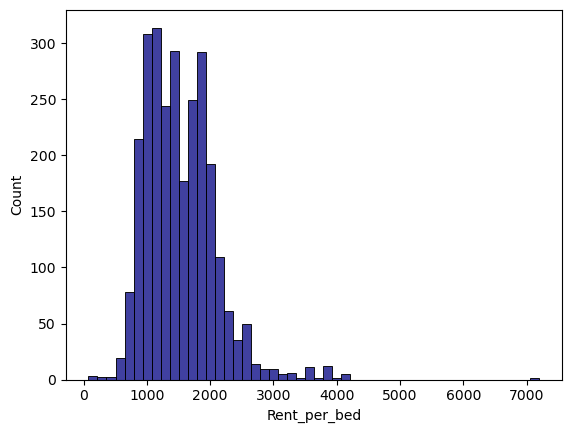

In [48]:
ax= sns.histplot(dub20['Rent_per_bed'], color='navy', bins=50)

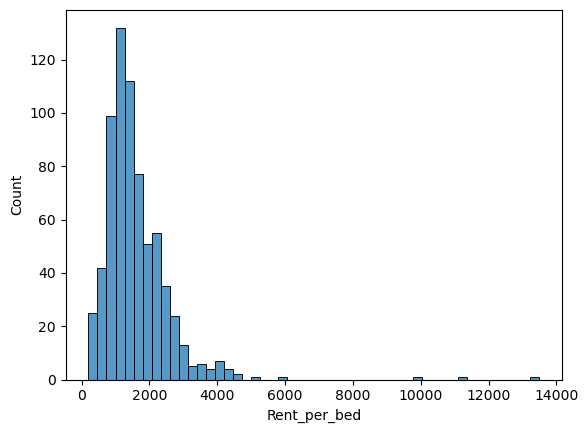

In [49]:
ax= sns.histplot(dub23['Rent_per_bed'], bins=50)

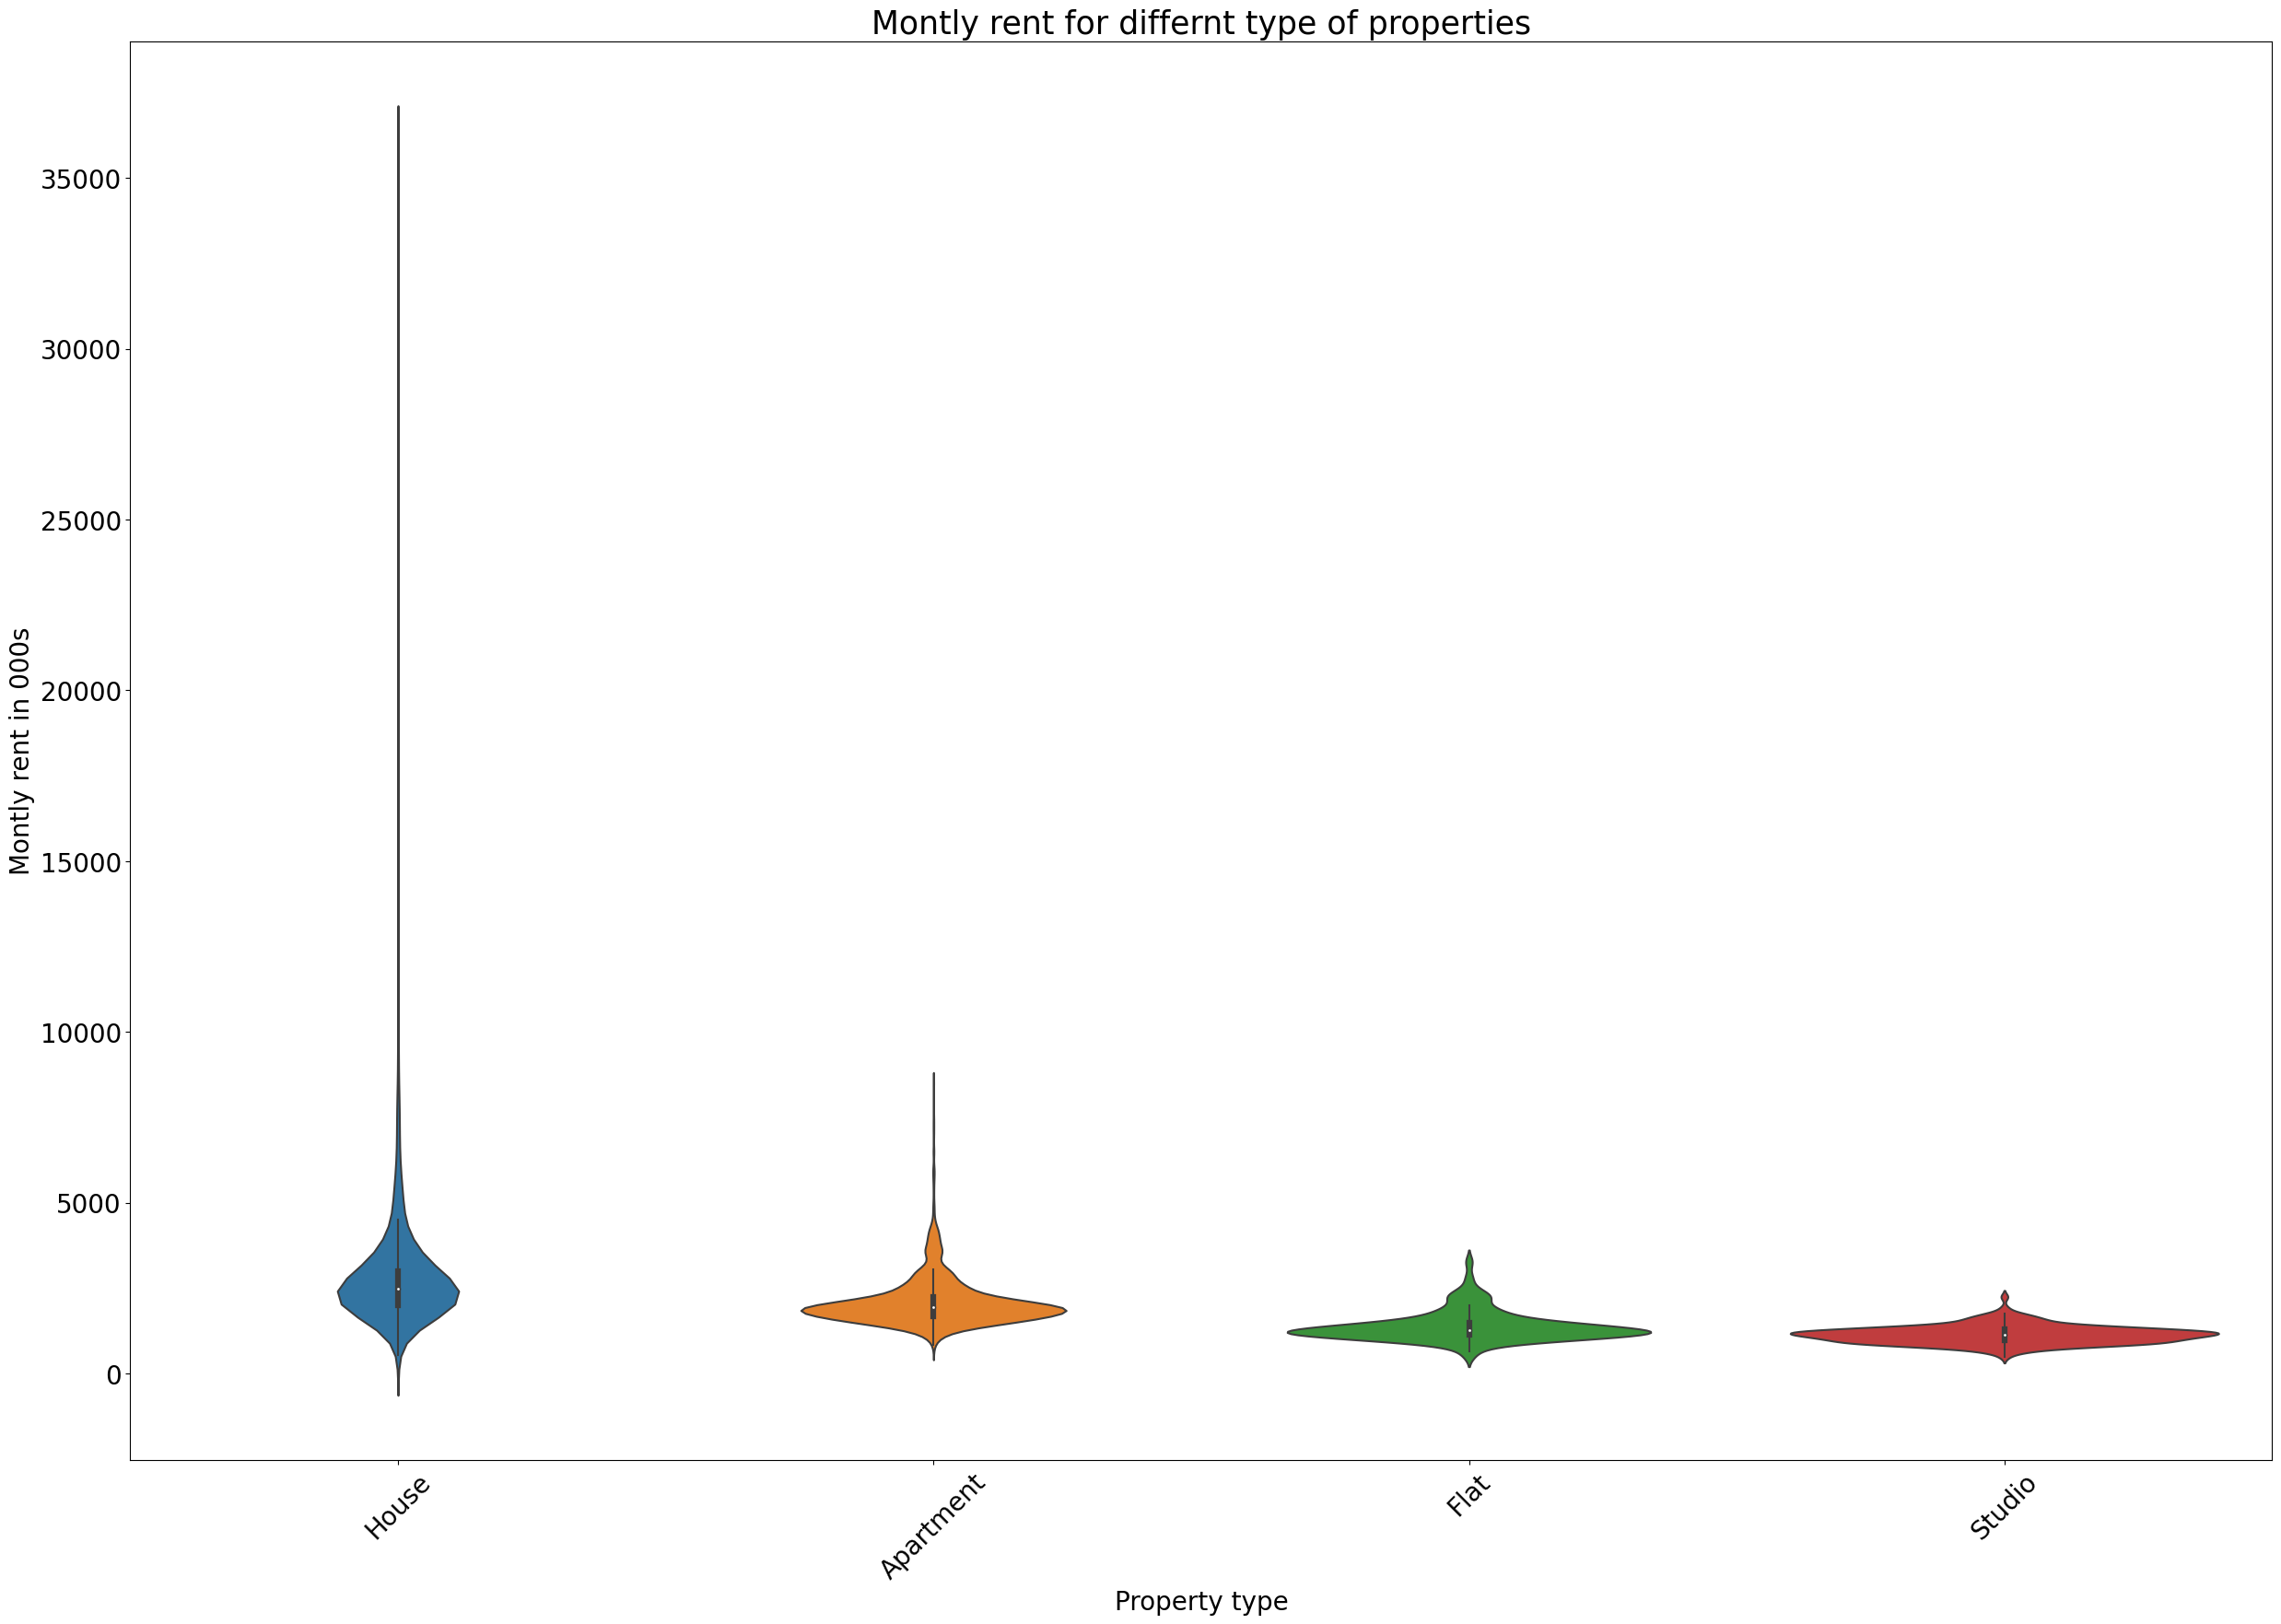

In [50]:
plt.figure(figsize=(30,20))
#x = dub20['property type']
#y = dub20['price']

ax= sns.violinplot( x= dub20['property type'], y= dub20['price'])

plt.title('Montly rent for differnt type of properties', fontsize= 25)
plt.xlabel('Property type', fontsize=20)
plt.ylabel('Montly rent in 000s', fontsize=20)
plt.setp(ax.get_xticklabels(), rotation =45)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);
plt.show()

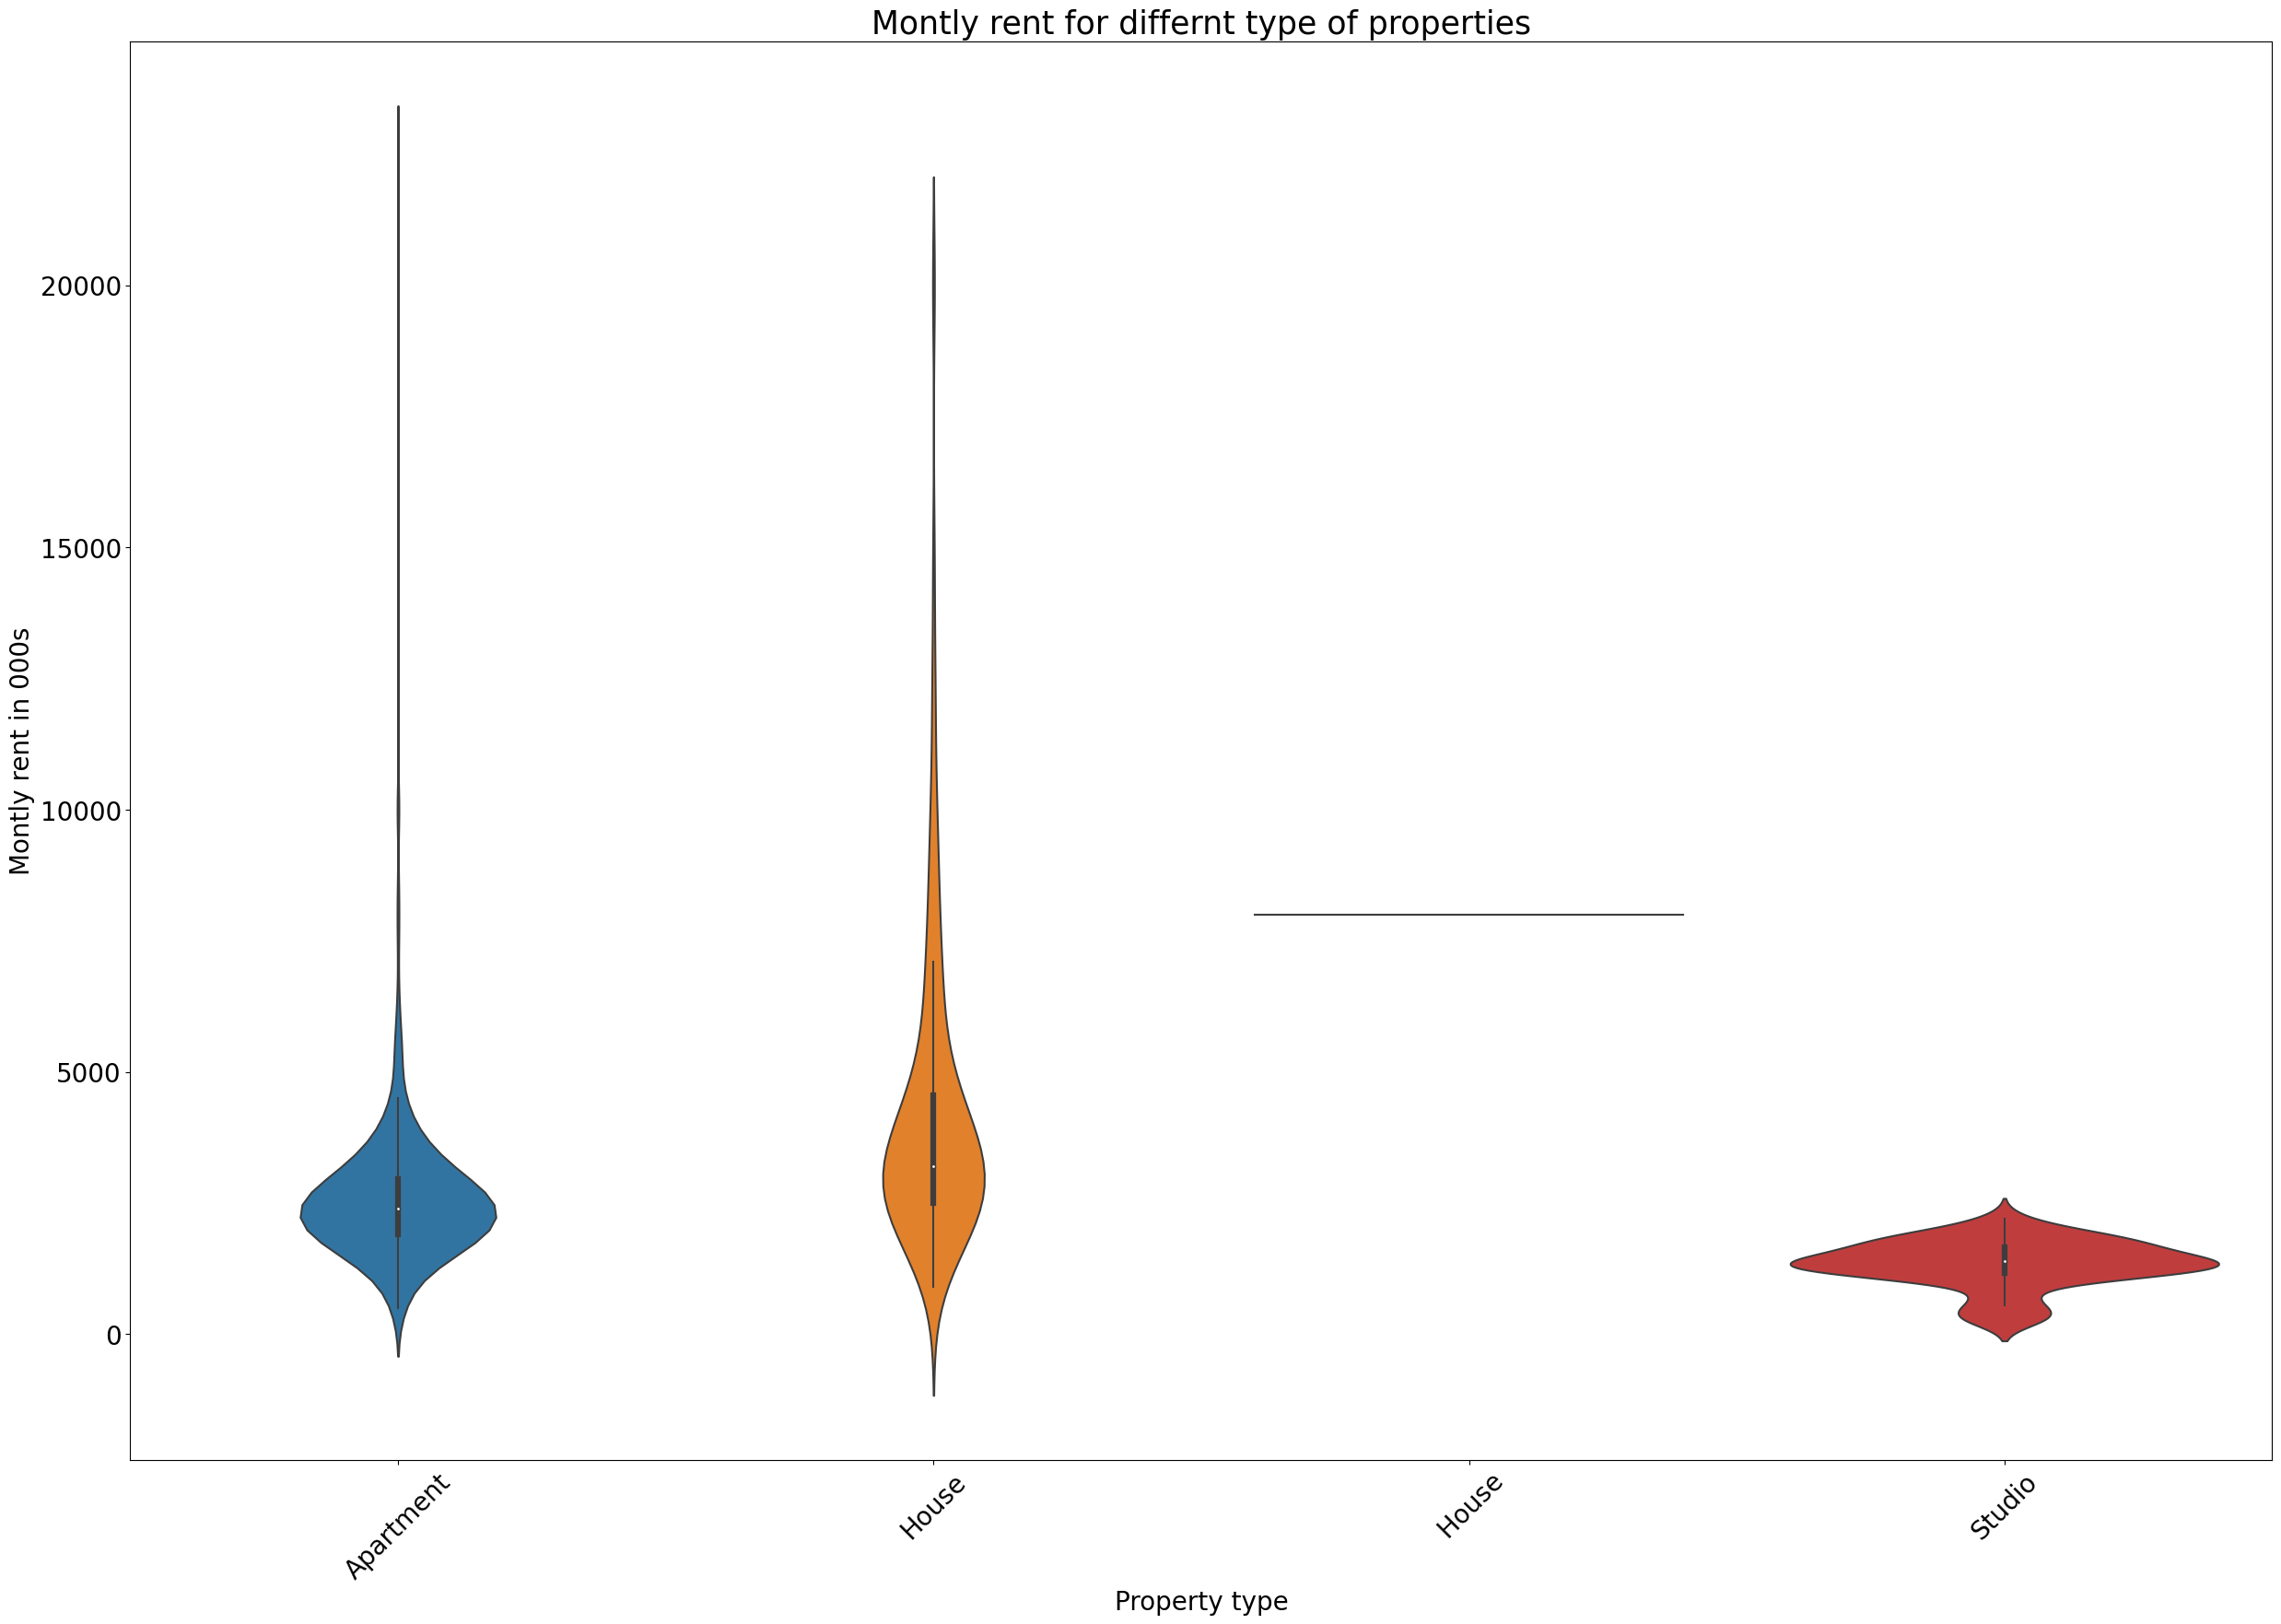

In [51]:
plt.figure(figsize=(30,20))
#x = dub20['property type']
#y = dub20['price']

ax= sns.violinplot( x= dub23['Property_type'], y= dub23['Rent'])

plt.title('Montly rent for differnt type of properties', fontsize= 25)
plt.xlabel('Property type', fontsize=20)
plt.ylabel('Montly rent in 000s', fontsize=20)
plt.setp(ax.get_xticklabels(), rotation =45)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);
plt.show()

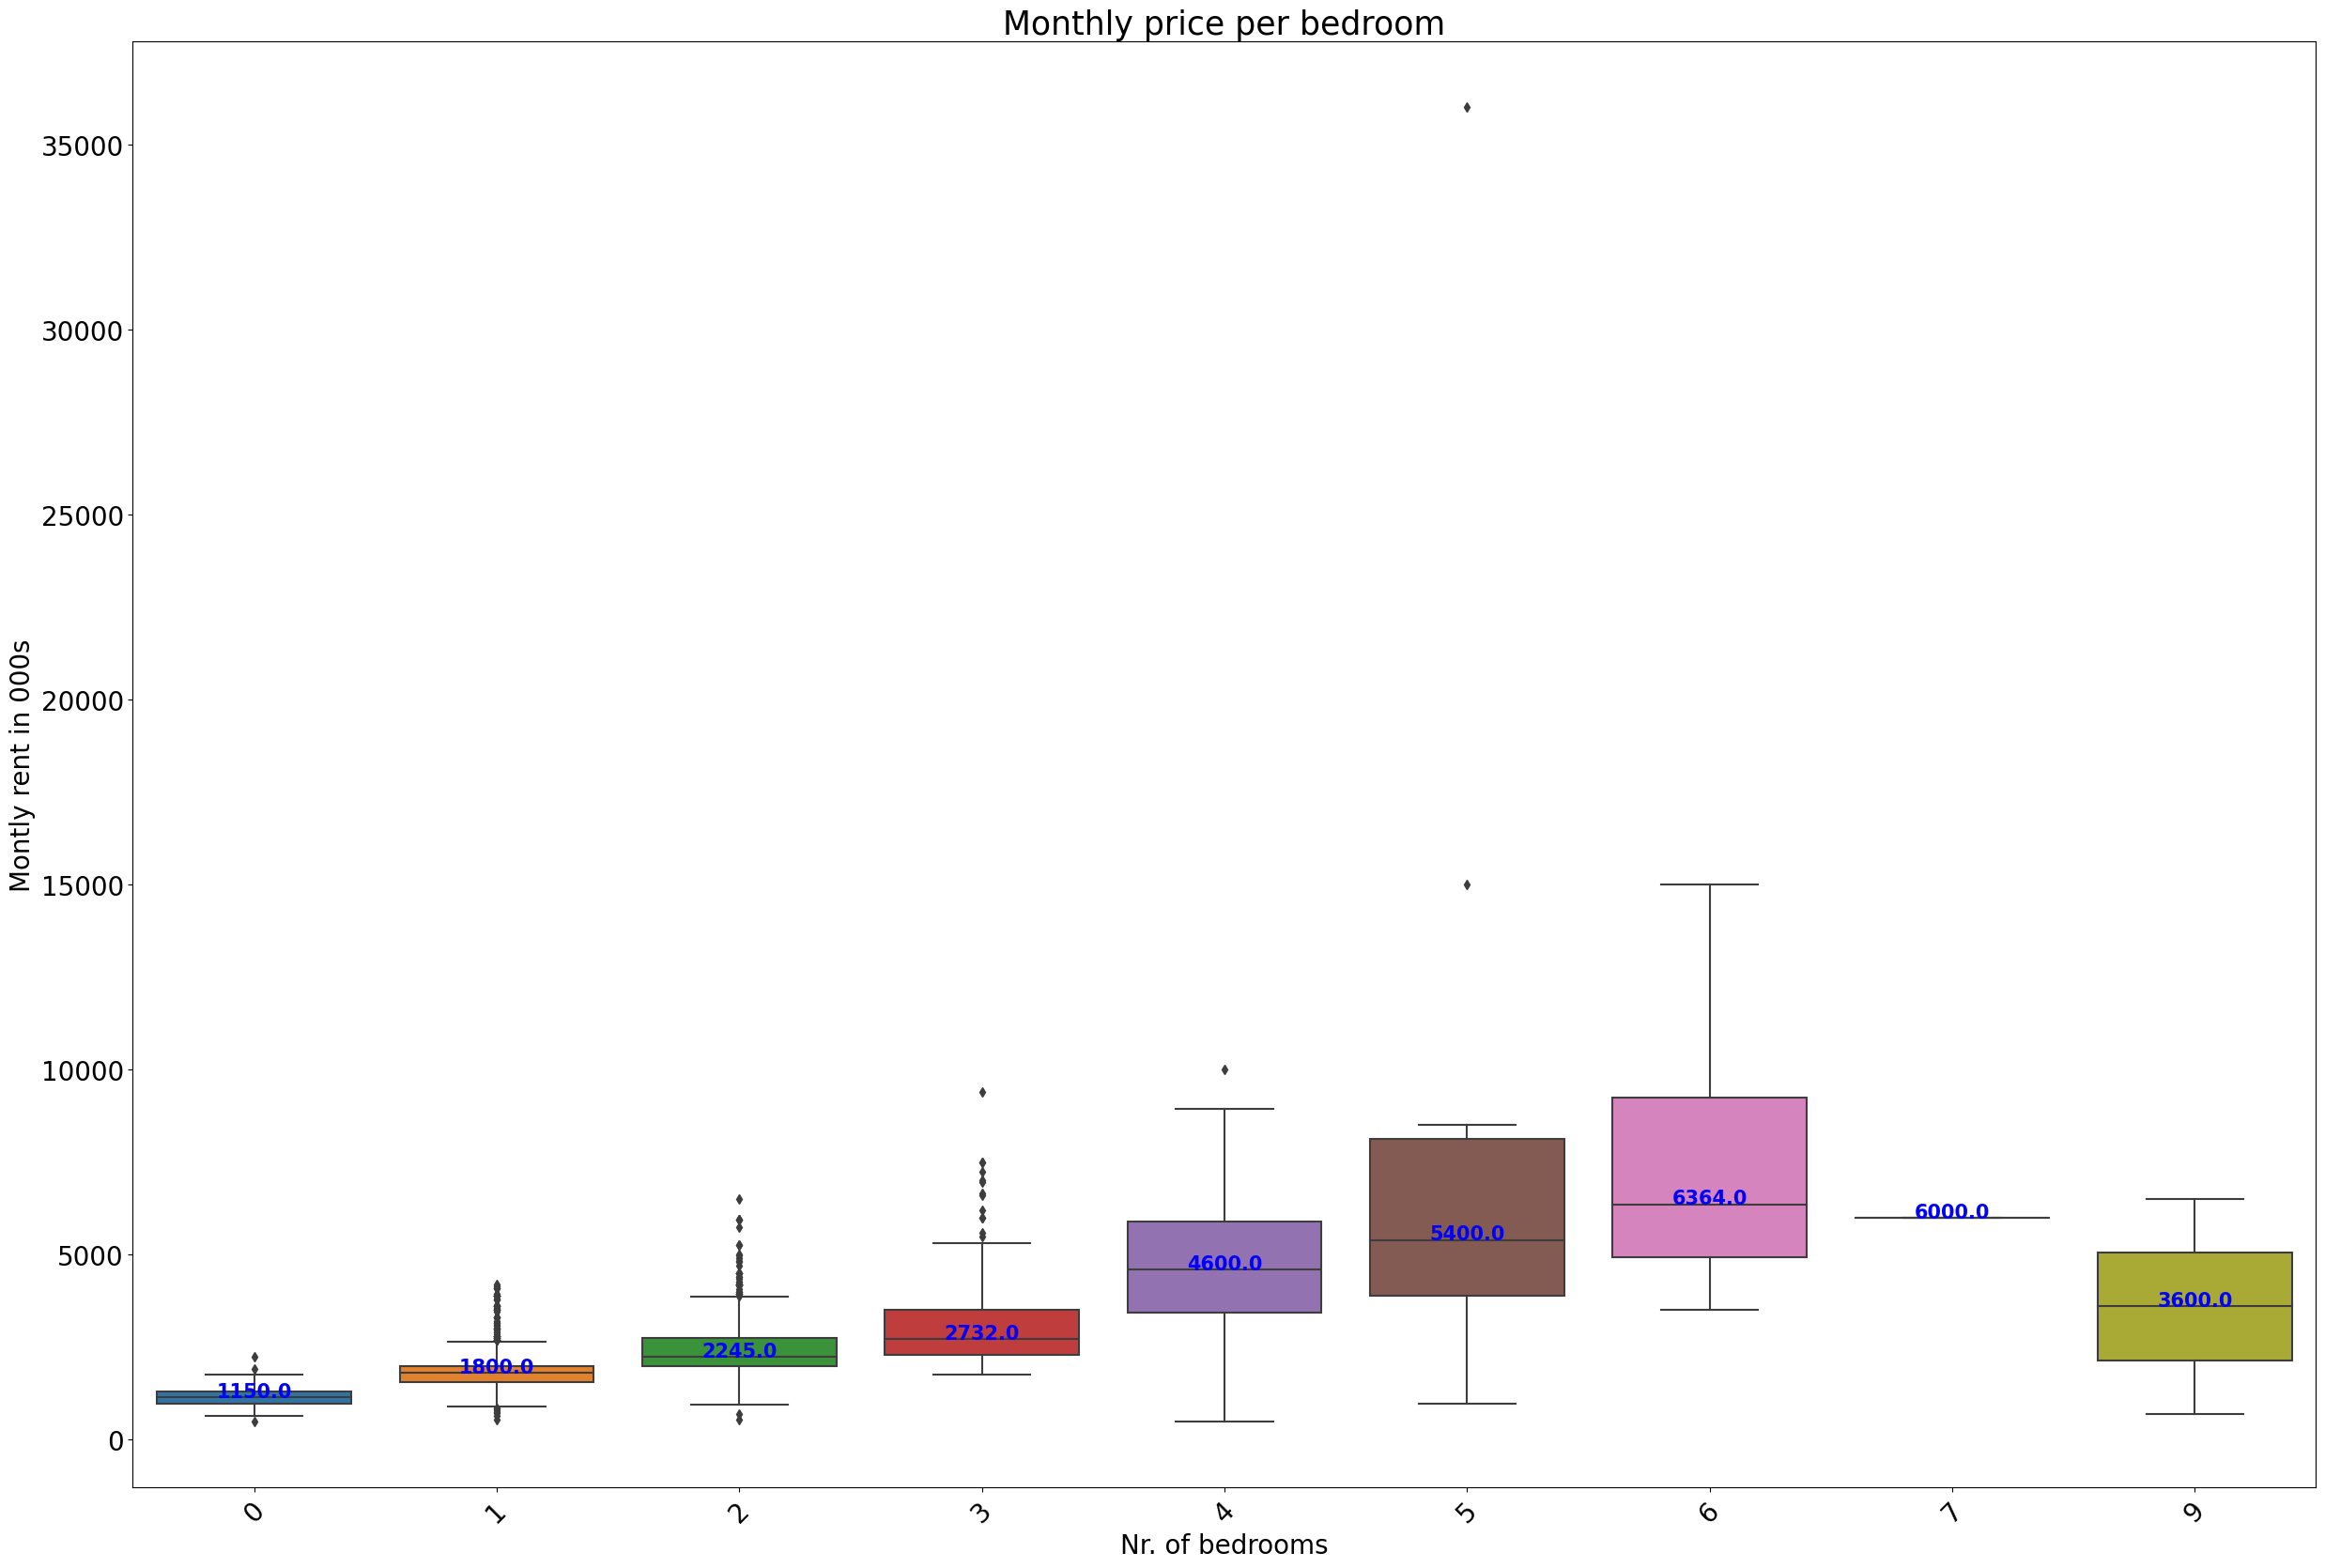

In [52]:
plt.figure(figsize=(30,20))



ax= sns.boxplot(x = dub20['bedroom'], y = dub20['price'], data = dub20)
m1 = dub20.groupby(['bedroom'])['price'].median().values
m1r = np.round(m1, 2) 
ind = 0
for tick in range(len(ax.get_xticklabels())):
    ax.text(tick+.001, m1r[ind]+.005, m1r[ind], horizontalalignment='center', color='b', weight='bold', fontsize=15)
    ind += 1

plt.title('Monthly price per bedroom', fontsize= 25)
plt.xlabel('Nr. of bedrooms', fontsize=20)
plt.ylabel('Montly rent in 000s', fontsize=20)
plt.setp(ax.get_xticklabels(), rotation =45)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);
plt.show()

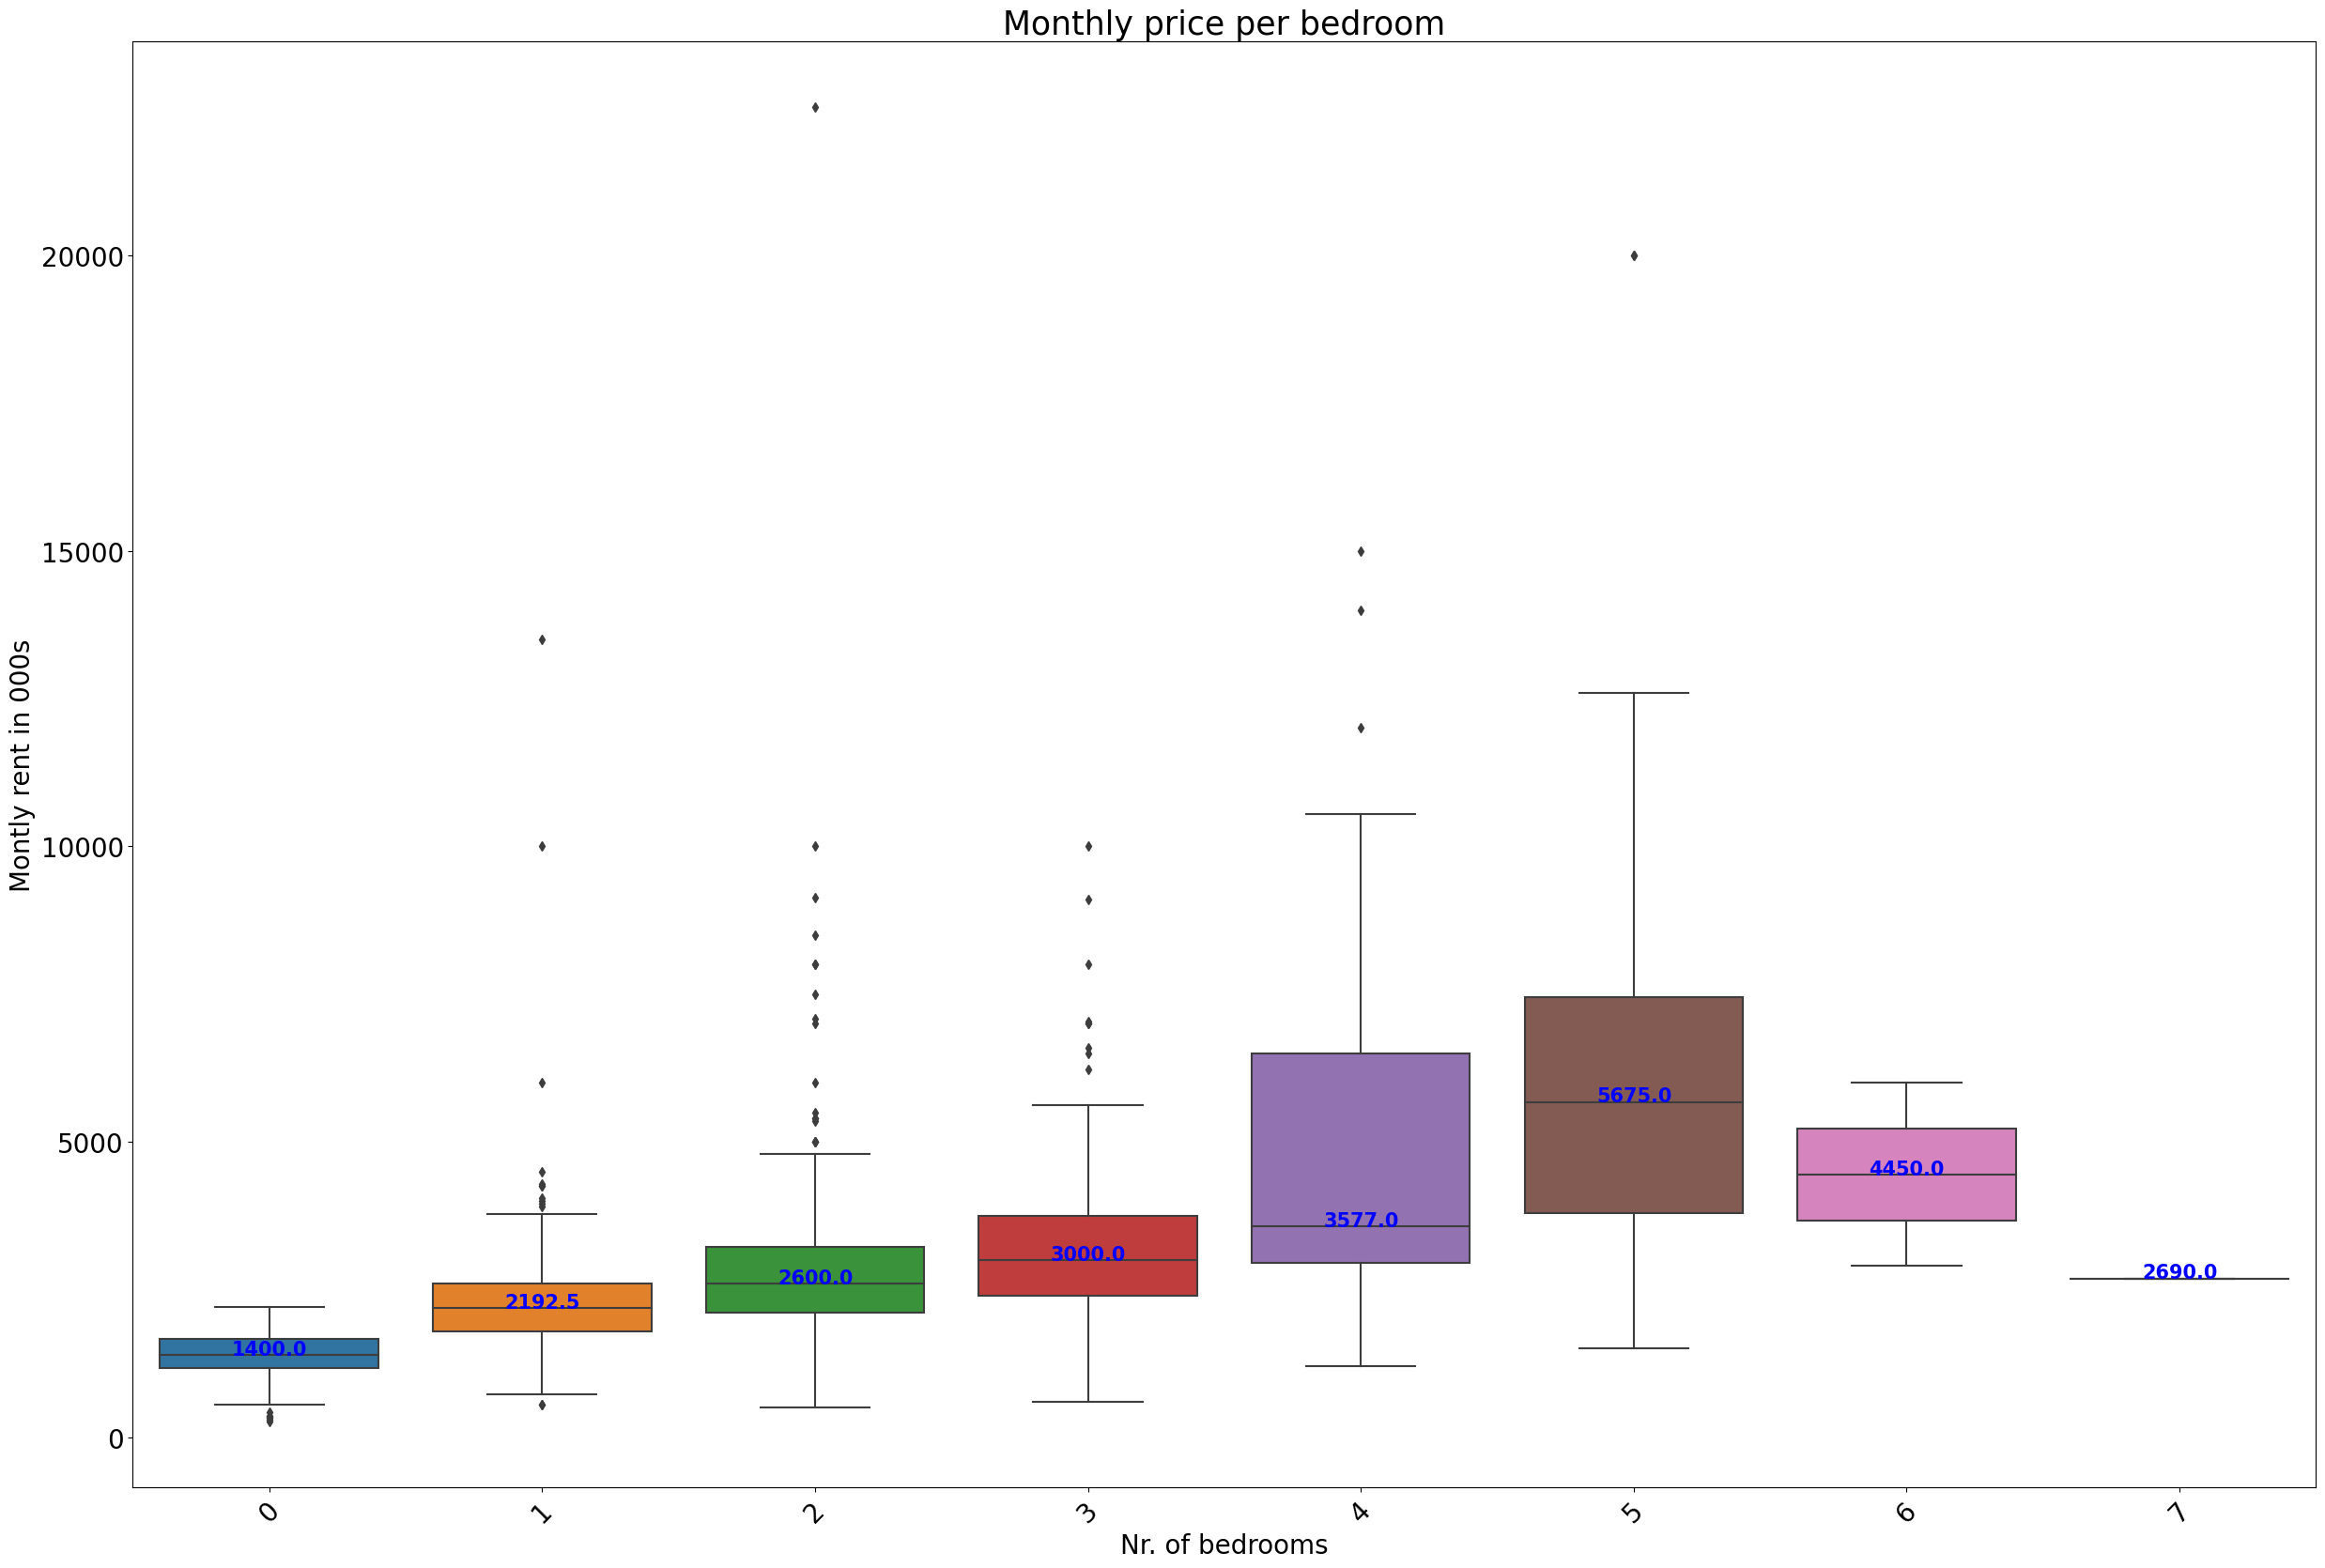

In [53]:
plt.figure(figsize=(30,20))



ax= sns.boxplot(x = dub23['Bedrooms'], y = dub23['Rent'], data = dub23)
m1 = dub23.groupby(['Bedrooms'])['Rent'].median().values
m1r = np.round(m1, 2) 
ind = 0
for tick in range(len(ax.get_xticklabels())):
    ax.text(tick+.001, m1r[ind]+.005, m1r[ind], horizontalalignment='center', color='b', weight='bold', fontsize=15)
    ind += 1

plt.title('Monthly price per bedroom', fontsize= 25)
plt.xlabel('Nr. of bedrooms', fontsize=20)
plt.ylabel('Montly rent in 000s', fontsize=20)
plt.setp(ax.get_xticklabels(), rotation =45)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);
plt.show()

In [54]:
#pip install folium

In [55]:
# It seemed that there were some special characters when I was trying to convert long and lat coordinates in dub20 to numbers
#so in this cell I'm getting rid of them

lati = []
longi = []

for index in range(len(dub20)):
    
    latitude = dub20.iloc[index]['latitude']
    longitude = dub20.iloc[index]['longitude']
    
    latitude = re.findall(r'-?\d+\.?\d*e?-?\d*?', latitude)[0]
    longitude = re.findall(r'-?\d+\.?\d*e?-?\d*?', longitude)[0]
    
    lati.append(latitude)
    longi.append(longitude)
    
     
    
dub20['latitude'] = lati
dub20['longitude'] = longi

In [56]:
#Converting latitude and longitude coordinates to numbers

dub20['latitude'] = dub20['latitude'].apply(lambda x: float(x))
dub20['longitude'] = dub20['longitude'].apply(lambda x: float(x))
dub23['Longitude'] = dub23['Longitude'].apply(lambda x: float(x))
dub23['Latitude'] = dub23['Latitude'].apply(lambda x: float(x))

In [57]:
#Dublin map, Rent per room September 2020

dublin_map = folium.Map(location=[53.3302,  -6.3106],zoom_start= 10) 

url = ("https://raw.githubusercontent.com/ihuston/dublin_parishes/master/data/cleaned_dublin_parishes.geojson")
dublin_parishes_edge = f"{url}"
for index, row in dub20.iterrows():
    folium.Marker([row['latitude'], row['longitude']],
                  popup=f"Price: {row['Rent_per_bed']}").add_to(dublin_map)
    

folium.GeoJson(dublin_parishes_edge, name= "geojson").add_to(dublin_map)
dublin_map

In [58]:
# Dublin map , Rent per room June 2023

dublin_map = folium.Map(location=[53.3302,  -6.3106],zoom_start= 10) # Dublin's map

url = ("https://raw.githubusercontent.com/ihuston/dublin_parishes/master/data/cleaned_dublin_parishes.geojson")
dublin_parishes_edge = f"{url}"
for index, row in dub23.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']],
                  popup=f"Price: {row['Rent_per_bed']}").add_to(dublin_map)

folium.GeoJson(dublin_parishes_edge, name= "geojson").add_to(dublin_map)
dublin_map

In [59]:
dublin_map = folium.Map(location=[53.3498, -6.2603], zoom_start=12)
for index, row in dub23.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']],
                  popup=f"Price: {row['Rent_per_bed']}").add_to(dublin_map)
dublin_map

In [60]:
dublin_villages = gpd.read_file('https://raw.githubusercontent.com/ihuston/dublin_parishes/master/data/cleaned_dublin_parishes.geojson')

In [61]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [62]:
url = 'https://raw.githubusercontent.com/ihuston/dublin_parishes/master/data/cleaned_dublin_parishes.geojson'
response = requests.get(url)
data = response.text

In [63]:
dublin_boroughs = json.loads(data)
dublin_boroughs["features"][1]

{'id': '1',
 'type': 'Feature',
 'properties': {'Parish Name': 'Ballybrack - Killiney'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-6.111792439933751, 53.270239350202445],
    [-6.104069147080613, 53.26675402289507],
    [-6.106763792577231, 53.26577828132787],
    [-6.111567519800053, 53.25891424512473],
    [-6.112533938000613, 53.24566319061002],
    [-6.115436971034447, 53.245481195506756],
    [-6.118755646909547, 53.243019111021574],
    [-6.120523981671116, 53.2433107003474],
    [-6.121516470515747, 53.24438416520004],
    [-6.12321212327683, 53.247557158213276],
    [-6.12316243870425, 53.25094741003928],
    [-6.124858107130685, 53.25128086802361],
    [-6.124891358043061, 53.252208558062556],
    [-6.132483653566037, 53.2514369855532],
    [-6.136750757294634, 53.24750431841058],
    [-6.140267699788185, 53.249799000482746],
    [-6.136748971333176, 53.25181482785399],
    [-6.139614677298041, 53.254678002313746],
    [-6.137752294453671, 53.25604182525264],
    [

In [64]:
dublin_boroughs

{'type': 'FeatureCollection',
 'features': [{'id': '0',
   'type': 'Feature',
   'properties': {'Parish Name': 'Cabinteely'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-6.148265634861978, 53.26563679631947],
      [-6.147939882601309, 53.264539539619456],
      [-6.146432323522026, 53.264619539731854],
      [-6.143688501596143, 53.26231415524564],
      [-6.139614677298041, 53.254678002313746],
      [-6.136748971333176, 53.25181482785399],
      [-6.140267699788185, 53.249799000482746],
      [-6.136750757294634, 53.24750431841058],
      [-6.134808623810518, 53.245543266359235],
      [-6.13874988297446, 53.23967953990018],
      [-6.137461238190537, 53.23713479270362],
      [-6.135305086171893, 53.236068241211385],
      [-6.137286543790154, 53.23437306138003],
      [-6.148926325437901, 53.237254029047946],
      [-6.155150802076369, 53.23651291291458],
      [-6.158341783454666, 53.234967105996674],
      [-6.167924358674897, 53.23442523117067],
      [-6.17856102

In [65]:
borough_names = []
for feature in dublin_boroughs['features']:
    properties = feature['properties']
    borough_name = properties['Parish Name']
    borough_names.append(borough_name)

In [66]:
borough_polygons = {}
for index in range(len(dublin_boroughs['features'])):
    borough_name = dublin_boroughs['features'][index]['properties']['Parish Name']
    borough_polygon = dublin_boroughs['features'][index]['geometry']['coordinates']
    borough_polygons[borough_name] = borough_polygon

In [67]:
borough_name

'Celbridge'

In [68]:
                        ###Fix this code becaue I'd prefer to use this method 

# dublin_boroughs = json.loads(data)

# # Create a dictionary to map borough names to polygons
# for index in range(len(dublin_boroughs['features'])):
# borough_name = dublin_boroughs['features'][index]['properties']['Parish Name']
# borough_polygon = dublin_boroughs['features'][index]['geometry']['coordinates'][0]

# if len(borough_polygon) == 1:
# borough_polygon = borough_polygon[0]
# borough_polygons[borough_name] = borough_polygon

# # Define a function to check if a latitude and longitude point is within a borough polygon and extract the borough name
# def get_borough_name(latitude, longitude, borough_polygons):
# point = Point(longitude, latitude)
# for borough_name, borough_polygon in borough_polygons.items():
# if point.within(borough_polygon):
#     return borough_name
# return None

# # Test the function with sample latitude and longitude coordinates
# latitude = 53.3498
# longitude = -6.2603
# borough_name = get_borough_name(latitude, longitude, borough_polygons)
# if borough_name is not None:
# print(f"The coordinates ({latitude}, {longitude}) are within the {borough_name} borough.")
# else:
# print("The coordinates are not within any borough.")

In [69]:
for index in range(len(dublin_boroughs['features'])):
    borough_name = dublin_boroughs['features'][index]['properties']['Parish Name']
    borough_polygon = dublin_boroughs['features'][index]['geometry']['coordinates'][0]
    
    if len(borough_polygon) == 1:
        borough_polygon = borough_polygon[0]
    borough_polygons[borough_name] = borough_polygon

In [70]:
def is_in_poly(p, borough_polygon):
    """
    :param p: [x, y]
    :param poly: [[], [], [], [], ...]
    :return:
    """
    px, py = p
    is_in = False
    for i, corner in enumerate(borough_polygon):
        next_i = i + 1 if i + 1 < len(borough_polygon) else 0
        x1, y1 = corner
        x2, y2 = borough_polygon[next_i]
        if (x1 == px and y1 == py) or (x2 == px and y2 == py):  # if point is on vertex
            is_in = True
            break
        if min(y1, y2) < py <= max(y1, y2):  # find horizontal edges of polygon
            x = x1 + (py - y1) * (x2 - x1) / (y2 - y1)
            if x == px:  # if point is on edge
                is_in = True
                break
            elif x > px:  # if point is on left-side of line
                is_in = not is_in
    return is_in

In [71]:
i = 0
dub20["borough_names"] = "na"
parishes_list = []
for index in range(len(dub20)):
    # get the longitude and latitude
    longitude = float(dub20.iloc[index]["longitude"])
    latitude = float(dub20.iloc[index]["latitude"])
    position = [longitude,latitude]

    for key,value in borough_polygons.items():
        if is_in_poly(position,value):
            dub20.iloc[index,-1] = key
            break

In [72]:
dub20.head()

price                                            address  bathroom  \
0  36000            Sorrento Road, Dalkey, South Co. Dublin         5   
1  15000  Ailesbury Road, Ballsbridge, Dublin 4, South D...         6   
2  15000  5 Elgin Road, Ballsbridge, Ballsbridge, Dublin...         5   
3  10000  Elgin Road, Ballsbridge, Ballsbridge, Dublin 4...         5   
4   9400  3 Tempe Terrace, Rockfort Avenue, Dalkey, Sout...         5   

   bedroom      furnish                                        description  \
0        5    Furnished  \n                        Rent is 1,200 per n...   
1        6    Furnished  \n                        Knight Frank are ple...   
2        5  Unfurnished  \n                        REA Halnon McKenna a...   
3        4  Unfurnished  \n                        Professionally Manag...   
4        3  Unfurnished  \n                        AVAILABLE JANUARY 20...   

  property type        ID  longitude   latitude Rent_per_bed    borough_names  
0         House  21612293  -6.096875  53.274311       7200.0           Dalkey  
1         House  22045922  -6.217086  53.320058       2500.0       Donnybrook  
2         House  22048233  -6.236891  53.330032       3000.0  Haddington Road  
3         House  22043562  -6.233272  53.329613       2500.0  Haddington Road  
4         House  22059358  -6.100353  53.276994  3133.333333           Dalkey

In [73]:
i = 0
dub23["borough_names"] = "na"
parishes_list = []
for index in range(len(dub23)):
    # get the longitude and latitude
    longitude = float(dub23.iloc[index]['Longitude'])
    latitude = float(dub23.iloc[index]['Latitude'])
    position = [longitude,latitude]

    for key,value in borough_polygons.items():
        if is_in_poly(position,value):
            dub23.iloc[index,-1] = key
            break

In [74]:
dub23.head()

Rent Property_type  Bedrooms  Bathrooms  \
0  1800     Apartment         1          1   
1  2600     Apartment         2          2   
2  3300     Apartment         2          2   
3  1695     Apartment         1          1   
4  3100     Apartment         2          2   

                                            Address   Latitude  Longitude  \
0         40 Castlewood Avenue, Rathmines, Dublin 6  53.322812  -6.263295   
1         120 Grianan Fidh, Aiken's Village, Dublin  53.261764  -6.217312   
2                  Apt. 6, 34 Ushers Quay, Dublin 8  53.345870  -6.279770   
3  1o Gandon Hall Gardner Street Dublin 1, Dublin 1  53.352269  -6.255170   
4            The Sweepstakes, Ballsbridge, Dublin 4  53.331647  -6.228297   

  Rent_per_bed                    borough_names  
0       1800.0                        Rathmines  
1       1300.0                        Sandyford  
2       1650.0  Meath Street and Merchants Quay  
3       1695.0                    Pro Cathedral  
4       1550.0                       Sandymount

In [75]:
borough_per_room_20 = (dub20['Rent_per_bed'].groupby(dub20['borough_names'])).mean()

In [76]:
borough_per_room_20 

borough_names
Ardlea                   1377.333333
Artane                   1850.000000
Aughrim Street           1291.580247
Ayrfield                 2233.333333
Balally                  1363.960784
                            ...     
Westland Row             1933.792237
Whitefriar Street        1960.108696
Willington               1250.000000
Yellow Walls Malahide     989.597222
na                       1094.901961
Name: Rent_per_bed, Length: 154, dtype: float64

In [77]:
borough_per_room_23 = (dub23['Rent_per_bed'].groupby(dub23['borough_names'])).mean()

In [78]:
borough_per_room_23

borough_names
Ardlea                         775.000000
Aughrim Street                1041.666667
Balally                       1420.147436
Baldoyle                      1566.666667
Ballinteer                    1765.000000
                                 ...     
Terenure                      1261.111111
University (Newman) Church    1424.285714
Westland Row                  1550.555556
Whitefriar Street             1075.000000
na                            1592.444444
Name: Rent_per_bed, Length: 121, dtype: float64

In [79]:
dublin_map = folium.Map(location=[53.3302,  -6.3106],zoom_start= 11) # Dublin's map

url = ("https://raw.githubusercontent.com/ihuston/dublin_parishes/master/data/cleaned_dublin_parishes.geojson")
dublin_borough = f"{url}"

# folium.GeoJson(dublin_parishes_edge, name= "geojson").add_to(dublin_map)

f = folium.Choropleth(
        geo_data= dublin_borough,
        data = dub20,
        columns=['borough_names','Rent_per_bed'],
        key_on="feature.properties.Parish Name",
        name="choropleth",
        bins = 8,
        fill_color = "YlGnBu",
        fill_opacity=0.7,
        line_opacity=0.2,
        highlight=True
    ).add_to(dublin_map)

folium.LayerControl().add_to(dublin_map)


f.geojson.add_child(
    folium.features.GeoJsonTooltip(['Parish Name'],labels=False)
)


dublin_map

    

In [80]:
dublin_map = folium.Map(location=[53.3302,  -6.3106],zoom_start= 11) # Dublin's map

url = ("https://raw.githubusercontent.com/ihuston/dublin_parishes/master/data/cleaned_dublin_parishes.geojson")
dublin_borough = f"{url}"

# folium.GeoJson(dublin_parishes_edge, name= "geojson").add_to(dublin_map)

f = folium.Choropleth(
        geo_data= dublin_borough,
        data = dub23,
        columns=['borough_names','Rent_per_bed'],
        key_on="feature.properties.Parish Name",
        name="choropleth",
        bins = 8,
        fill_color = "YlGnBu",
        fill_opacity=0.7,
        line_opacity=0.2,
        highlight=True
    ).add_to(dublin_map)

folium.LayerControl().add_to(dublin_map)


f.geojson.add_child(
    folium.features.GeoJsonTooltip(['Parish Name'],labels=False)
)


dublin_map


## Conclusion

There are a few intersing points to notice:
~ The rent indeed increased between Spetember 2020 and June 2023 by average 776 euro. Though the increase of a rent per bedroom is only slight. 
~ There are far less properties available for rent. In Spetember 2020 there were 1869 apartments for rent; in June 2023 only 441. The number of available studio apartmetnts on the market also decreased significantly. 
~ Looking at the maps, it's noticable that more areas in Dublin had properties to rent in 2020.  